In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score


In [27]:
url="https://raw.githubusercontent.com/cior666/Machine-Learning-III-Entrega/refs/heads/main/Data%20preprocessing/spotify_reviews_preprocessed.csv"
df=pd.read_csv(url)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54708 entries, 0 to 54707
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   processed_text  54708 non-null  object
 1   sentiment       54708 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 854.9+ KB


In [28]:
#entrenamos el modelo y hacemos el split de train y test.
X = df['processed_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
#planteamos una funcion para evaluar los modelos de manera sistematica y general
def evaluar_modelo(y_true, y_pred, titulo=""):
    print(titulo)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {titulo}")
    plt.show()

In [30]:
#comenzamos con el BoW aplicandole la regresion logistica
bow = CountVectorizer(min_df=2, max_df=0.95, ngram_range=(1,1))
X_train_bow = bow.fit_transform(X_train)
X_test_bow  = bow.transform(X_test)
X_train_bow.shape, X_test_bow.shape


((43766, 7894), (10942, 7894))

Regresion logistica para BoW
Accuracy: 0.8783586181685249
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4954
           1       0.88      0.90      0.89      5988

    accuracy                           0.88     10942
   macro avg       0.88      0.88      0.88     10942
weighted avg       0.88      0.88      0.88     10942



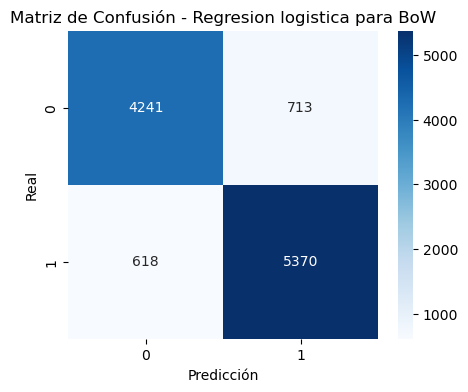

In [31]:
#Entrenamos la regresion logistica

lr_bow = LogisticRegression(max_iter=1000, C=1.0, solver="liblinear")
lr_bow.fit(X_train_bow, y_train)

y_pred_bow = lr_bow.predict(X_test_bow)
evaluar_modelo(y_test, y_pred_bow, "Regresion logistica para BoW")


In [32]:
#ahora vamos a ver las palabras mas positivas y negativas (osea los coeficientes)
feature_names_bow = bow.get_feature_names_out()
coef_bow = lr_bow.coef_[0]

coef_df_bow = pd.DataFrame({
    "palabra": feature_names_bow,
    "coeficiente": coef_bow
})
top_pos_bow = coef_df_bow.sort_values("coeficiente", ascending=False).head(15)
top_neg_bow = coef_df_bow.sort_values("coeficiente", ascending=True).head(15)
top_pos_bow, top_neg_bow


(          palabra  coeficiente
 915       awesome     2.470459
 2577    excellent     2.297221
 600       amazing     2.215819
 7766    wonderful     2.117934
 1217    brilliant     2.093854
 490    affordable     1.982969
 4218         love     1.962514
 4949  outstanding     1.957898
 7436        upper     1.946513
 2938       french     1.899965
 925        awsome     1.823831
 26           1010     1.809550
 2370         easy     1.786917
 3163        grate     1.759196
 4714         nice     1.725284,
              palabra  coeficiente
 3177          greedy    -2.694946
 5052        pathetic    -2.534803
 3418        horrible    -2.441457
 7156           trash    -2.434182
 4477  misinformation    -2.421838
 2148   disappointing    -2.205441
 2275        downhill    -2.104570
 6936        terrible    -1.986510
 7795           worst    -1.977069
 396           action    -1.948965
 5457          profit    -1.932390
 7384      unreliable    -1.914333
 5996         rubbish    -1.8965

In [33]:
#Ahora hacemos lo mismo para TF IDF
#entonces:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, ngram_range=(1,1))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((43766, 7894), (10942, 7894))

Regresion Logistica para TF-IDF
Accuracy: 0.8860354596965819
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4954
           1       0.91      0.88      0.89      5988

    accuracy                           0.89     10942
   macro avg       0.88      0.89      0.89     10942
weighted avg       0.89      0.89      0.89     10942



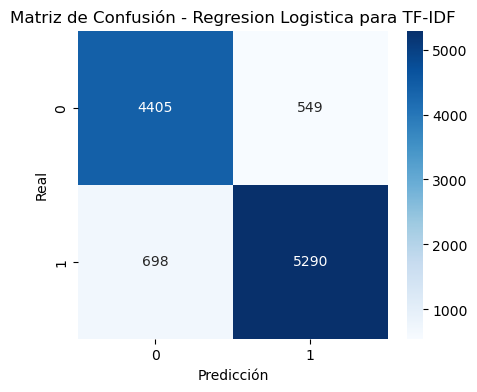

In [34]:
#Entrenamos la regresion logistica con TF IDF
lr_tfidf = LogisticRegression(max_iter=1000, C=1.0, solver="liblinear")
lr_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
evaluar_modelo(y_test, y_pred_tfidf, "Regresion Logistica para TF-IDF")

In [35]:
#En este caso tambien vamos a ver las palabras que mas aportan segun su coeficiente
feature_names_tfidf = tfidf.get_feature_names_out()
coef_tfidf = lr_tfidf.coef_[0]

coef_df_tfidf = pd.DataFrame({
    "palabra": feature_names_tfidf,
    "coeficiente": coef_tfidf
})

top_pos_tfidf = coef_df_tfidf.sort_values("coeficiente", ascending=False).head(15)
top_neg_tfidf = coef_df_tfidf.sort_values("coeficiente", ascending=True).head(15)

top_pos_tfidf, top_neg_tfidf


(        palabra  coeficiente
 4218       love     9.158620
 3168      great     7.364511
 3117       good     7.235116
 600     amazing     6.230268
 915     awesome     5.779802
 2370       easy     5.513135
 2577  excellent     4.782328
 4714       nice     4.621384
 6954      thank     4.182510
 7766  wonderful     3.662610
 2464      enjoy     3.568134
 5101    perfect     3.338265
 1217  brilliant     3.141847
 7752       wish     2.995575
 4955    overall     2.769115,
              palabra  coeficiente
 948              bad    -5.181220
 4477  misinformation    -4.685161
 3418        horrible    -4.613587
 7156           trash    -4.558114
 6936        terrible    -4.416221
 3023         garbage    -4.194276
 1266           buggy    -3.785178
 7471         useless    -3.607649
 1709      constantly    -3.419575
 6766            suck    -3.387580
 6000            ruin    -3.294888
 1337          cancel    -3.246043
 2148   disappointing    -3.222283
 919            awful    -3.2

In [36]:
######################################################################################################################
# Por ultimo vamos a realizar la validacion cruzada sobre el Train. Primero para el BoW enonces:

In [37]:

scores_bow = cross_val_score(
    lr_bow, X_train_bow, y_train,
    cv=5, scoring="f1"
)
scores_bow.mean(), scores_bow.std()

(np.float64(0.8830463966069025), np.float64(0.0035218585985308986))

In [38]:
#Para el TF IDF:
scores_tfidf = cross_val_score(
    lr_tfidf, X_train_tfidf, y_train,
    cv=5, scoring="f1"
)
scores_tfidf.mean(), scores_tfidf.std()


(np.float64(0.8869455502233411), np.float64(0.003694802996400462))

In [ ]:
#Ahora verificamos una nueva oracion para probar:
ejemplo = ["the app is great, works perfectly and music is awesome"]

ej_bow = bow.transform(ejemplo)
print("Prediccion BoW:", lr_bow.predict(ej_bow)[0])

ej_tfidf = tfidf.transform(ejemplo)
print("Prediccion TF-IDF:", lr_tfidf.predict(ej_tfidf)[0])


Pred BoW: 1
Pred TF-IDF: 1


In [40]:
#Otro ejemplo
ejemplo2=["the app is trash"]
ej_bow2=bow.transform(ejemplo2)
print("Prediccion BoW:",lr_bow.predict(ej_bow2)[0])

ej_tdidf2=tfidf.transform(ejemplo2)
print("Prediccion TF-IDF:",lr_tfidf.predict(ej_tfidf)[0])

Prediccion BoW: 0
Prediccion TF-IDF: 1
